In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/Users/apple/Documents/Python/Elevoo Internship/Loan Approval Prediction/Dataset/loan_approval_dataset.csv')

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Handle Missing Values

In [3]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else: 
        df[col] = df[col].fillna(df[col].median())

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Encoding Categoraical Columns With numerical Vales

In [4]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Split the dataset into features (X) and target (y)

In [6]:
# features
X = df.drop(['loan_id',' loan_status'],axis=1)

# We drop Loan_Status from X because it’s the target.
# We drop Loan_ID because it’s just an identifier — it has no predictive meaning.

# Target
y = df[' loan_status']

print(y.value_counts())

 loan_status
0    2656
1    1613
Name: count, dtype: int64


There is a big difference in counts of both classes that's why we have to use SMOTE

Spliting into training and test sets

 loan_status
0    2125
1    1290
Name: count, dtype: int64


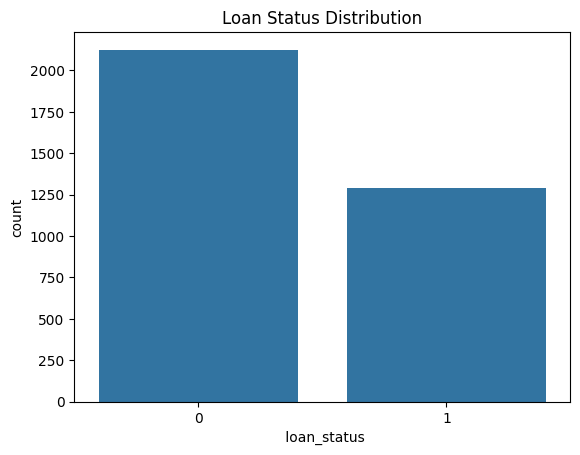

In [7]:
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state= 42,
    stratify=y
)

print(y_train.value_counts())

sns.countplot(x=y_train)
plt.title('Loan Status Distribution')
plt.show()

Handle Class Imbalance (SMOTE) : Balancing the count of both classes

 loan_status
1    2125
0    2125
Name: count, dtype: int64


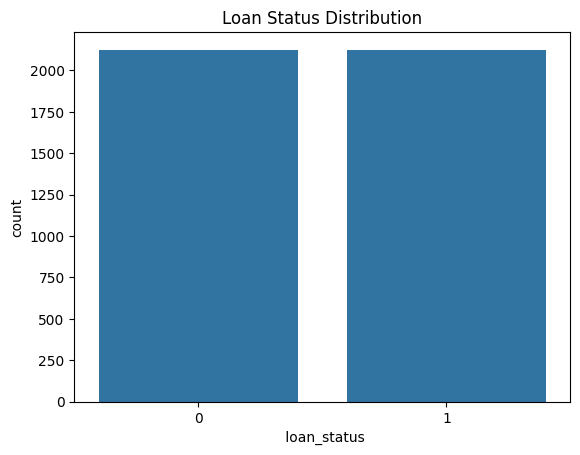

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train,y_train)

print(y_train_res.value_counts())


sns.countplot(x=y_train_res)
plt.title('Loan Status Distribution')
plt.show()

Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score

logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train_res,y_train_res)

y_predict_logistic_reg = logistic_reg.predict(X_test)

y_predict_logistic_reg_proba = logistic_reg.predict_proba(X_test)[:,1]

print('Logistic Regression Results')
print('Classification Report')
print(classification_report(y_test,y_predict_logistic_reg))

print("ROC-AUC Score:", roc_auc_score(y_test,y_predict_logistic_reg_proba))
print("-" * 50)


Logistic Regression Results
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       531
           1       0.73      0.72      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854

ROC-AUC Score: 0.8686571863357297
--------------------------------------------------


Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res,y_train_res)

y_predict_DT = dt.predict(X_test)
y_predict_DT_proba = dt.predict_proba(X_test)[:, 1]

print("Decision Tree Results:")
print('Classification_report')
print(classification_report(y_test,y_predict_DT))
print('ROC-AUC Score:',roc_auc_score(y_test,y_predict_DT_proba))

Decision Tree Results:
Classification_report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

ROC-AUC Score: 0.9760455475678229
